In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pynocular as pn
import numpy as np

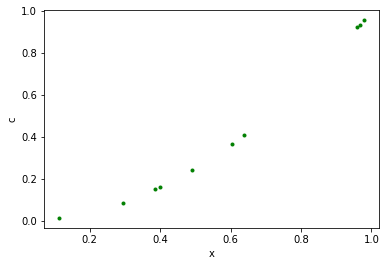

In [2]:
b = pn.PointData()
b['x'] = np.random.rand(10)
b['c'] = b['x']**2
b.plot('x', 'c', 'g.')

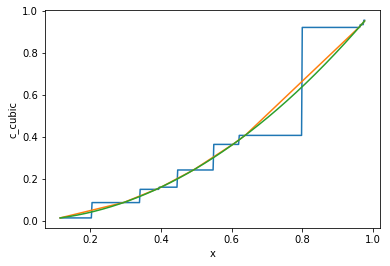

In [4]:
l = pn.PointData()
l['x'] = np.linspace(0,1,500)
l['c_nearest'] = b.interp(l[['x']], method='nearest')['c']
l['c_linear'] = b.interp(pn.PointData(x=l['x']), method='linear')['c']
l['c_cubic'] = b.interp(l[['x']], method='cubic')['c']
l.plot('x', 'c_nearest')
l.plot('x', 'c_linear')
l.plot('x', 'c_cubic')

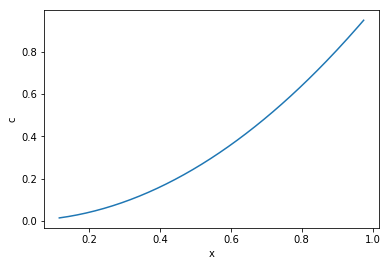

In [5]:
b.interp(pn.PointData(x=np.linspace(0,1,200))).plot()

In [6]:
l[['x']]

x,0,0.002,0.00401,0.00601,0.00802,0.01,...,0.99,0.992,0.994,0.996,0.998,1


In [7]:
g = pn.GridData()
g.grid['x'].edges = np.linspace(0,1,21)
g['c_nearest'] = b.interpolate('c', method='nearest', fill_value=0)
g['c_linear'] = b.interpolate('c', method='linear', fill_value=0)
g['c_cubic'] = b.interpolate('c', method='cubic', fill_value=0)
b.plot('x', 'c', 'ok')
g.plot_step('c_nearest')
g.plot_step('c_linear')
g.plot_step('c_cubic')

needs to be checked, is weird behaviour


AttributeError: 'PointData' object has no attribute 'interpolate'

In [5]:
pn.grid

<module 'pynocular.grid' from '/home/peller/pynocular/pynocular/grid.py'>

In [6]:
l['c_win'] = b.window('c', function=np.average, window=[(-0.1,0.1)])
l['c_win_2'] = l.interpolate('c_win', wrt='x', method='linear')
g['c_hist'] = b.histogram('c', function=np.average, fill_value=np.nan)
g['c_hist_2'] = b.histogram('c', function=np.average, fill_value=0)

Automatic with respect to x
(1, 500)


/home/peller/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/peller/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


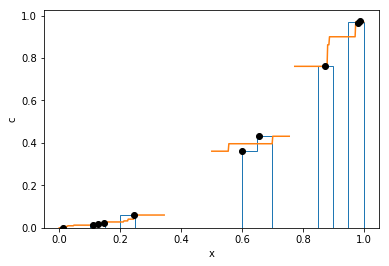

In [7]:
g.plot_step('c_hist')
#g.plot_step('c_hist_i')
#l.plot('x', 'c_win')
l.plot('x', 'c_win_2')
b.plot('x', 'c', 'ok')

In [8]:
g['c_hist_i'] = g.interpolate('c_hist', method='linear')

In [9]:
g['c_hist_i']

array([1.25757092e-04, 8.37628876e-03, 1.66268204e-02, 3.83916657e-02,
       6.01565110e-02, 9.77464971e-02, 1.35336483e-01, 1.72926469e-01,
       2.10516455e-01, 2.48106441e-01, 2.85696427e-01, 3.23286413e-01,
       3.60876399e-01, 4.31285874e-01, 5.13651273e-01, 5.96016672e-01,
       6.78382071e-01, 7.60747470e-01, 8.65247692e-01, 9.69747915e-01])

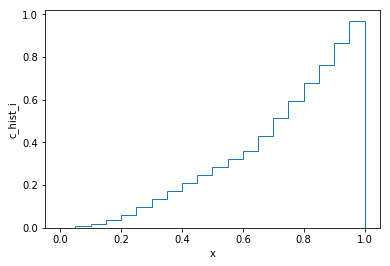

In [10]:
g.plot_step('c_hist_i')


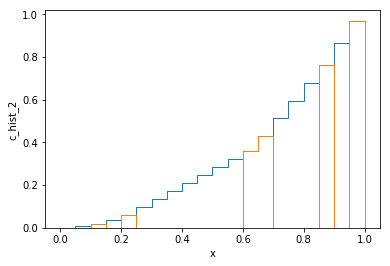

In [11]:
g.plot_step('c_hist_i')
g.plot_step('c_hist_2')

In [12]:
g = pn.GridData()
g.grid['x'].edges = np.linspace(0,1,21)
g.grid['y'].edges = np.linspace(0,1,21)


In [13]:
g.flat('x')

array([0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,
       0.025, 0.025, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075,
       0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075,
       0.075, 0.075, 0.075, 0.075, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.175, 0.175, 0.175,
       0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175,
       0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.225,
       0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225,
       0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.225,
       0.225, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275,
       0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275,
       0.275, 0.275, 0.275, 0.325, 0.325, 0.325, 0.325, 0.325, 0.325,
       0.325, 0.325,

In [14]:
g['a'] = np.zeros(g.shape)

In [15]:
g['a'].ravel()[3] = 4

In [16]:
g.get_array('a', flat=True)[7] = 5

In [17]:
g['a']

array([[0., 0., 0., 4., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [18]:
p = pn.PointData()

In [19]:
p['a'] = np.linspace(0,100,100)

In [22]:
p[p['a'] < 5]['a']

array([0.        , 1.01010101, 2.02020202, 3.03030303, 4.04040404])